https://medium.com/@muhammadfarrukh2001/exploratory-data-analysis-on-clinical-heart-failure-dataset-5c9daa266c10

In [2]:
import pandas as pd
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
print(df.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [5]:
print(df.iloc[183:191,0:2])
df['age']=df['age'].astype(int)

        age  anaemia
183  75.000        0
184  58.000        1
185  60.667        1
186  50.000        0
187  60.000        0
188  60.667        1
189  40.000        0
190  80.000        0


In [6]:
for column in df.columns:
    if column in ['anemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']:
        print(column,": ",df[column].unique())
duplicates=df.duplicated().sum()
print("\nNumber of duplicates:",duplicates)

diabetes :  [0 1]
high_blood_pressure :  [1 0]
sex :  [1 0]
smoking :  [0 1]
DEATH_EVENT :  [1 0]

Number of duplicates: 0


In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.829431,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894997,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot: >

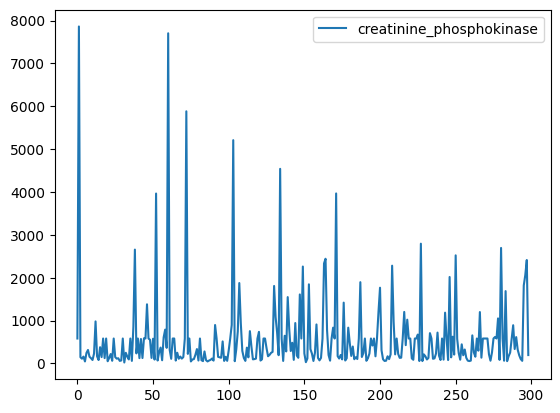

In [8]:
df.plot(y='creatinine_phosphokinase', use_index=True)

age                            AxesSubplot(0.125,0.53;0.227941x0.35)
platelets                   AxesSubplot(0.398529,0.53;0.227941x0.35)
creatinine_phosphokinase    AxesSubplot(0.672059,0.53;0.227941x0.35)
serum_creatinine               AxesSubplot(0.125,0.11;0.227941x0.35)
ejection_fraction           AxesSubplot(0.398529,0.11;0.227941x0.35)
serum_sodium                AxesSubplot(0.672059,0.11;0.227941x0.35)
dtype: object

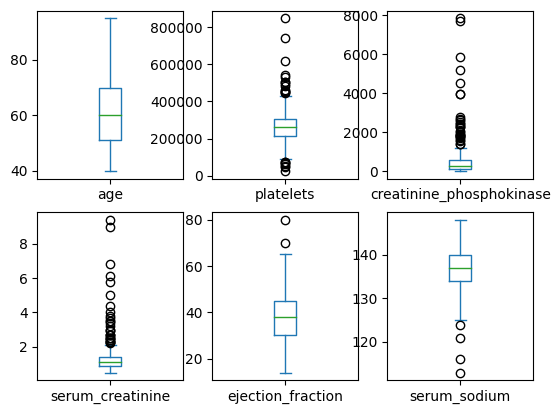

In [27]:
df[['age','platelets','creatinine_phosphokinase','serum_creatinine','ejection_fraction','serum_sodium']].plot(kind='box',subplots=True,layout=(2,3))

<AxesSubplot: xlabel='anaemia,diabetes,high_blood_pressure,smoking,sex,DEATH_EVENT'>

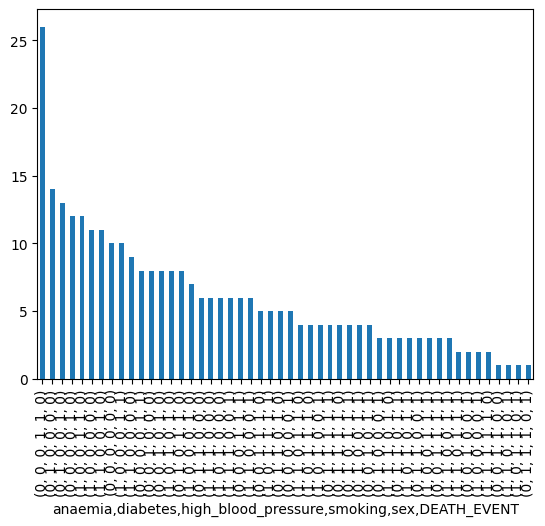

In [35]:
(df[['anaemia','diabetes','high_blood_pressure','smoking','sex','DEATH_EVENT']]
 .value_counts()
 .plot(kind='bar')
)

array([<AxesSubplot: title={'center': 'None'}, xlabel='anaemia,diabetes'>],
      dtype=object)

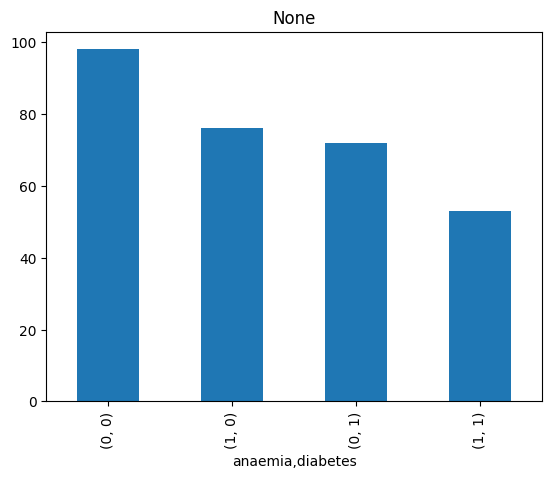

In [41]:
(df[['anaemia','diabetes']]
 .value_counts()
 .plot(kind='bar')
)

<AxesSubplot: xlabel='anaemia,diabetes'>

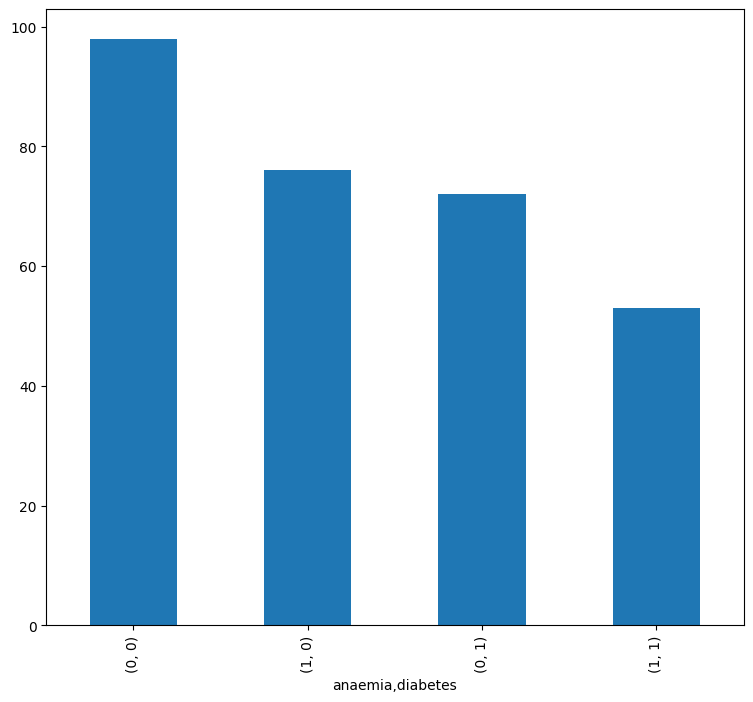

In [45]:
df[['anaemia','diabetes']].value_counts().plot(x=["anaemia", "diabetes"], kind="bar", figsize=(9, 8))

In [49]:
result = df[['anaemia','diabetes']].groupby(by=['anaemia','diabetes']).count()
print()
print(result)

result.plot(kind='bar')


Empty DataFrame
Columns: []
Index: [(0, 0), (0, 1), (1, 0), (1, 1)]


TypeError: no numeric data to plot